# Setup

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(24, 13.5)}, font_scale = 2.7)

In [3]:
#input args
out_dir = './out'
log_id = 1

#derived args
split_logs_dir = f'{out_dir}/split_logs/'

In [4]:
#access all 3 measurement axes
dim3 = lambda x : [x + '_' + s for s in ['x', 'y', 'z']]

# IMU Plotting

In [5]:
imu_log = pd.read_csv(f'{split_logs_dir}/imu.csv', index_col = 0)

imu_log.head()

,Timestamp,Time_s,Log Entry Type,Sensor Board ID,Sensor Board Timestamp,Sensor Type,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z
Log Entry,,,,,,,,,,,,
3,11,0.011,SENSOR,3,0,IMU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,21,0.021,SENSOR,3,13599,IMU,-0.081055,0.039062,0.944336,0.076336,-1.755725,38.351145
7,31,0.031,SENSOR,3,13599,IMU,-0.081055,0.039062,0.944336,0.076336,-1.755725,38.351145
9,41,0.041,SENSOR,3,13599,IMU,-0.081055,0.039062,0.944336,0.076336,-1.755725,38.351145
11,51,0.051,SENSOR,3,13639,IMU,-0.092773,0.039062,0.955078,-1.709924,-7.114504,39.938931


In [6]:
#convert from wide to long format for plotting

imu_log.reset_index(inplace = True)
imu_log_long = pd.wide_to_long(imu_log, stubnames=['Acc', 'Gyro'], i = 'Log Entry', j='Axis', sep='_', suffix='\w')
imu_log_long['Axis'] = imu_log_long.index.get_level_values(1)
imu_log_long.head()

,,Sensor Board ID,Log Entry Type,Sensor Board Timestamp,Timestamp,Time_s,Sensor Type,Acc,Gyro,Axis
Log Entry,Axis,,,,,,,,,
3,x,3,SENSOR,0,11,0.011,IMU,0.000000,0.000000,x
5,x,3,SENSOR,13599,21,0.021,IMU,-0.081055,0.076336,x
7,x,3,SENSOR,13599,31,0.031,IMU,-0.081055,0.076336,x
9,x,3,SENSOR,13599,41,0.041,IMU,-0.081055,0.076336,x
11,x,3,SENSOR,13639,51,0.051,IMU,-0.092773,-1.709924,x


(-1, 2)

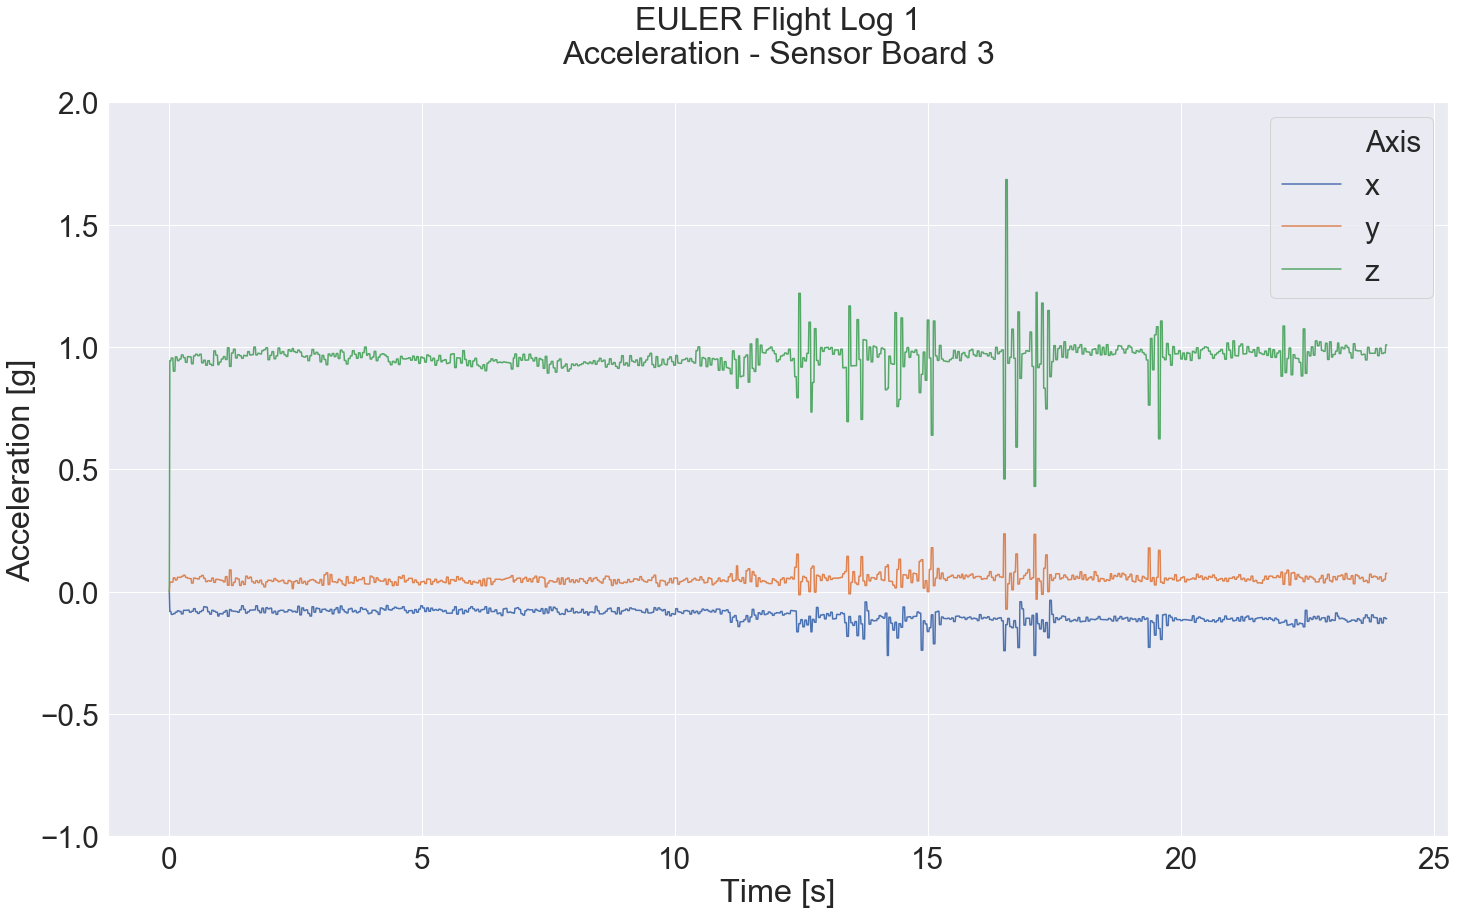

In [7]:
plt = sns.lineplot(data = imu_log_long, x = 'Time_s', y = 'Acc', hue = 'Axis')
plt.set_title(f'EULER Flight Log {log_id}\nAcceleration - Sensor Board 3\n')
plt.set_ylabel('Acceleration [g]')
plt.set_xlabel('Time [s]')
plt.set_ylim(-1, 2)

Text(0.5,0,'Time [s]')

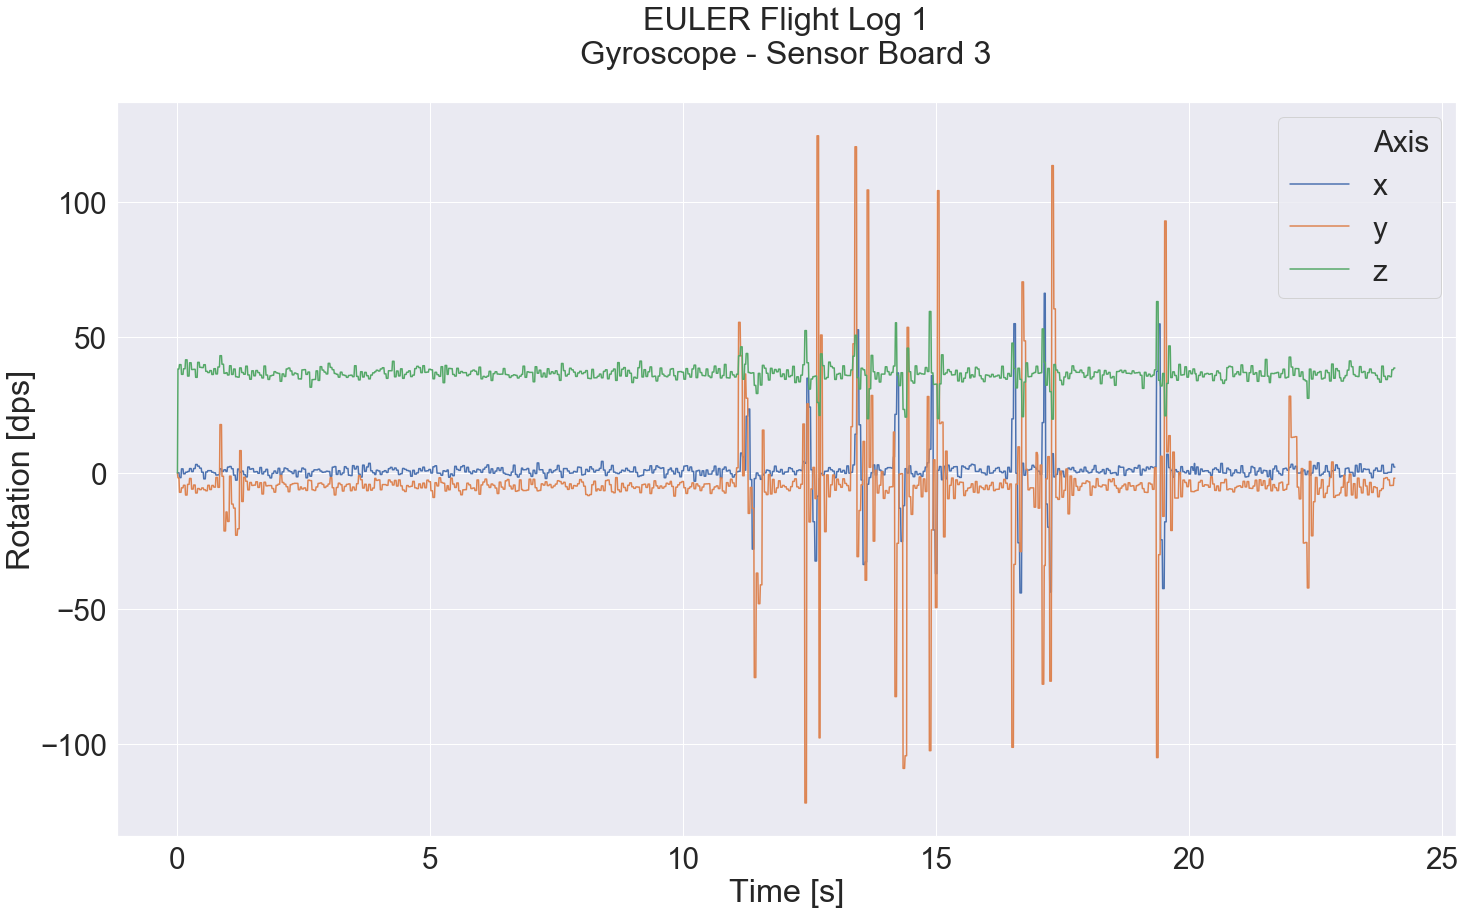

In [8]:
plt = sns.lineplot(data = imu_log_long, x = 'Time_s', y = 'Gyro', hue = 'Axis')
plt.set_title(f'EULER Flight Log {log_id}\nGyroscope - Sensor Board 3\n')
plt.set_ylabel('Rotation [dps]')
plt.set_xlabel('Time [s]')

# Baro + Temp Plotting

In [9]:
baro_log = pd.read_csv(f'{split_logs_dir}/baro.csv', index_col = 0)
baro_log.head()

,Timestamp,Time_s,Log Entry Type,Sensor Board ID,Sensor Board Timestamp,Sensor Type,Pressure,Temperature
Log Entry,,,,,,,,
2,11,0.011,SENSOR,3,0,BARO,0,0.00
4,21,0.021,SENSOR,3,13603,BARO,-3232,28.82
6,31,0.031,SENSOR,3,13703,BARO,-3232,28.82
8,41,0.041,SENSOR,3,13703,BARO,-3232,28.82
10,51,0.051,SENSOR,3,13703,BARO,-3232,28.82


Text(0.5,0,'Time [s]')

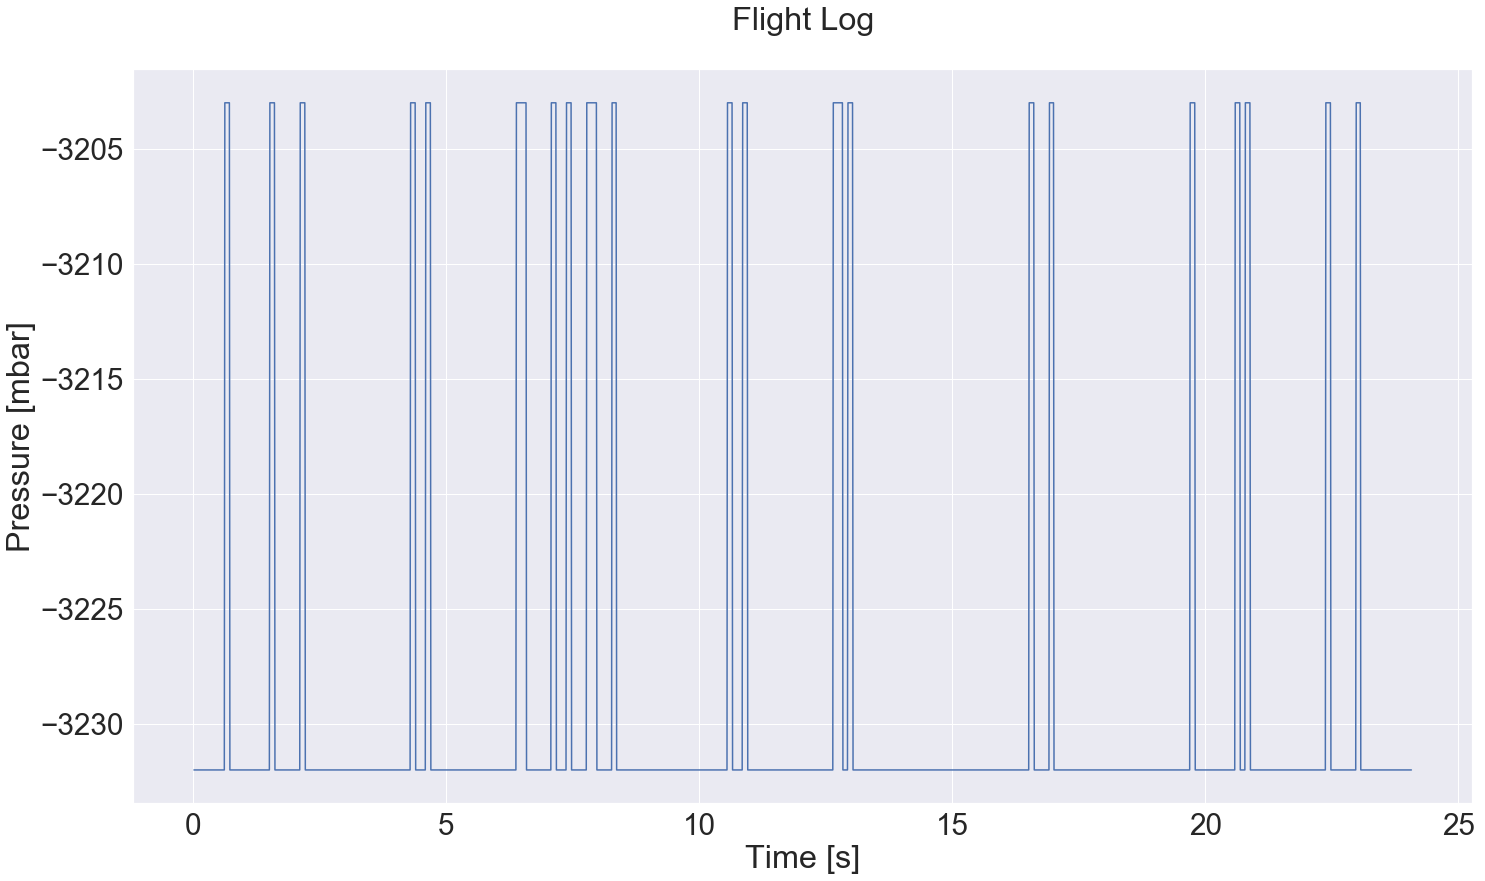

In [10]:
plt = sns.lineplot(data = baro_log[1:], x = 'Time_s', y = 'Pressure')
plt.set_title('Flight Log\n')
#plt.set_ylim(-3300, -3100)
plt.set_ylabel('Pressure [mbar]')
plt.set_xlabel('Time [s]')

Text(0.5,0,'Time [s]')

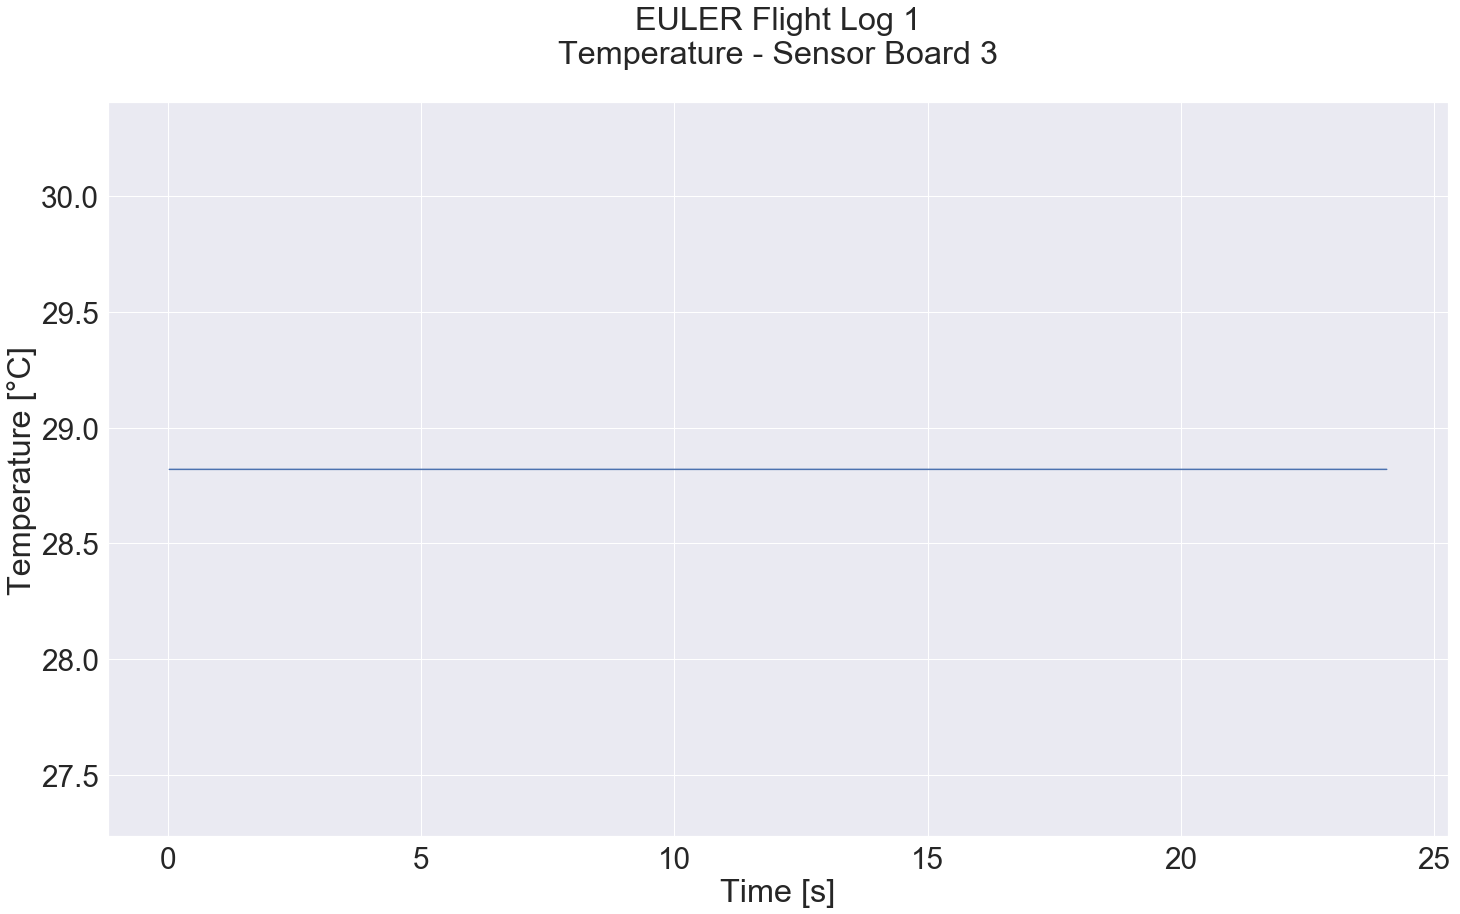

In [11]:
plt = sns.lineplot(data = baro_log[1:], x = 'Time_s', y = 'Temperature')
plt.set_title(f'EULER Flight Log {log_id}\nTemperature - Sensor Board 3\n')
plt.set_ylabel('Temperature [\N{DEGREE SIGN}C]')
plt.set_xlabel('Time [s]')
#plt.set_ylim(-3300, -3100)
#ylabels = ['{:,.1f}'.format(y) + '\N{DEGREE SIGN}C' for y in plt.get_yticks()]
#plt.set_yticklabels(ylabels)